<a href="https://colab.research.google.com/github/RiseNShine-sontu/AI_Project/blob/main/skin_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50
shuffle=True

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/gdrive/MyDrive/skin',
    shuffle=True,
    image_size=(256, 256),
    batch_size=32,
)

Found 1257 files belonging to 1 classes.


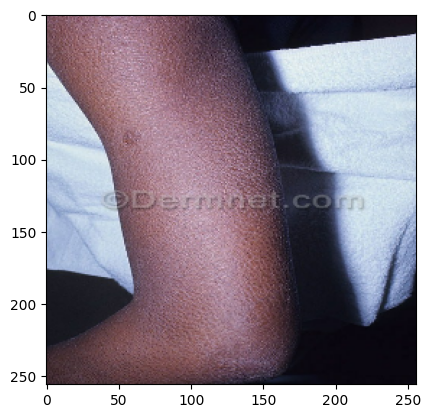

In [ ]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle_size=10000):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size= int(train_split*ds_size)
  val_size= int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds= ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
# Define shuffle variable and set it to True or False based on your requirements
shuffle = True  # or shuffle = False

# Use the shuffle variable in your code
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
Input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

model =models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(512,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation='relu', input_shape= Input_shape),
    #BatchNormalization(),
     #Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1,activation='sigmoid')

])
model.build(input_shape= Input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
32/32 [==============================] - 90s 3s/step - loss: 0.1175 - accuracy: 0.9361 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 86s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 80s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 80s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 80s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 81s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 80s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [ ]:
score=model.evaluate(test_ds)

4/4 [==============================] - 6s 647ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

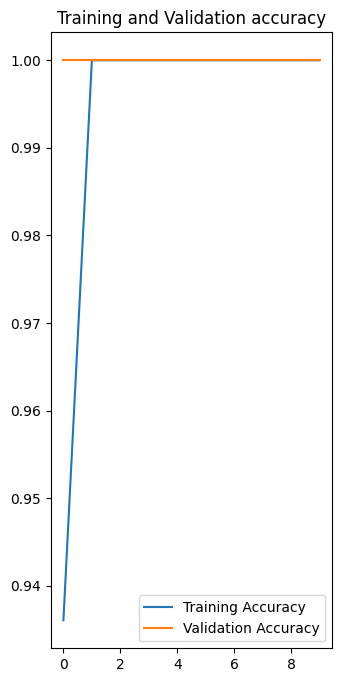

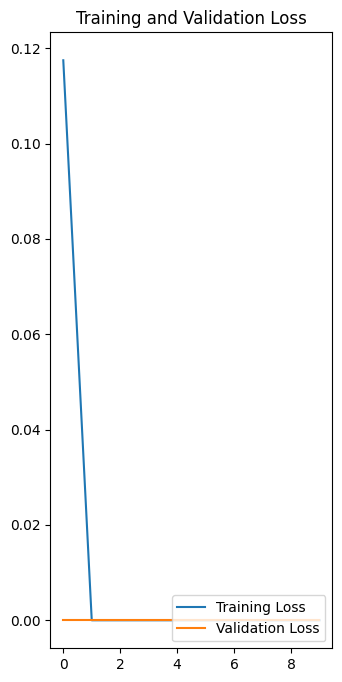

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='Training Accuracy')
plt.plot(range(10),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),loss,label='Training Loss')
plt.plot(range(10),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
# Save the model to a file in .h5 format
model.save('skin_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Download the saved model file
files.download('skin_model.h5')